In [75]:
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.model_selection import train_test_split
import xgboost as xgb
import random
import matplotlib.pyplot as plt
import keras
from keras.layers import LSTM, Dropout, Dense, Flatten, Input, LeakyReLU, BatchNormalization
from keras.models import Sequential, Model, load_model
from keras.utils import plot_model
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\Kevin\\Desktop\\Data3001\datascience-cis-2022.csv")

In [3]:
df['time'] = pd.to_datetime(df['time'], unit='ns')

In [6]:
df_new = df[['time', 'FromInternetTCPPort80IPurn:ietf:params:mud:controllerPacketCount',
            'ToInternetTCPPort80IPurn:ietf:params:mud:controllerPacketCount',
            'ToInternetUDPPort1024IPurn:ietf:params:mud:controllerPacketCount', 'device_mac']]

In [64]:
df_dev = df[df_new['device_mac'] == 'bd:0d:8e:c5']

In [65]:
df_dev.head()

,time,FromInternetTCPPort443IPurn:ietf:params:mud:controllerByteCount,FromInternetTCPPort443IPurn:ietf:params:mud:controllerPacketCount,FromInternetTCPPort554IPurn:ietf:params:mud:controllerByteCount,FromInternetTCPPort554IPurn:ietf:params:mud:controllerPacketCount,FromInternetTCPPort80IPurn:ietf:params:mud:controllerByteCount,FromInternetTCPPort80IPurn:ietf:params:mud:controllerPacketCount,FromInternetUDPPort67IPurn:ietf:params:mud:controllerByteCount,FromInternetUDPPort67IPurn:ietf:params:mud:controllerPacketCount,ToInternetRSVPPortAllIPurn:ietf:params:mud:controllerByteCount,...,ToInternetTCPPort554IPurn:ietf:params:mud:controllerPacketCount,ToInternetTCPPort80IPurn:ietf:params:mud:controllerByteCount,ToInternetTCPPort80IPurn:ietf:params:mud:controllerPacketCount,ToInternetUDPPort1024IPurn:ietf:params:mud:controllerByteCount,ToInternetUDPPort1024IPurn:ietf:params:mud:controllerPacketCount,ToLocalUDPPort5353IP224.0.0.251/32ByteCount,ToLocalUDPPort5353IP224.0.0.251/32PacketCount,ToLocalUDPPort67IP255.255.255.255/32ByteCount,ToLocalUDPPort67IP255.255.255.255/32PacketCount,device_mac
0,2022-09-02 00:24:59.417,0,0,0,0,0,0,0,0,3568,...,0,395738,957,12625992,9093,0,0,0,0,bd:0d:8e:c5
774,2022-09-02 00:25:59.386,0,0,0,0,0,0,0,0,3568,...,0,415242,1004,12193996,8775,0,0,0,0,bd:0d:8e:c5
1525,2022-09-02 00:26:59.365,0,0,0,0,0,0,0,0,3568,...,0,409825,979,12459296,8993,0,0,0,0,bd:0d:8e:c5
2246,2022-09-02 00:27:59.422,0,0,0,0,0,0,0,0,3568,...,0,393513,962,12473905,9003,0,0,0,0,bd:0d:8e:c5
2999,2022-09-02 00:28:59.461,0,0,0,0,0,0,1400,4,3568,...,0,395554,955,12659277,9135,0,0,906,2,bd:0d:8e:c5


In [66]:
df_dev.set_index('time', inplace=True)

In [67]:
df_dev.describe()
FromInternetTCPPort80IPurn:ietf:params:mud:controllerByteCount
FromInternetTCPPort80IPurn:ietf:params:mud:controllerPacketCount
FromInternetUDPPort67IPurn:ietf:params:mud:controllerByteCount
FromInternetUDPPort67IPurn:ietf:params:mud:controllerPacketCount
ToInternetRSVPPortAllIPurn:ietf:params:mud:controllerByteCount
ToInternetRSVPPortAllIPurn:ietf:params:mud:controllerPacketCount
ToInternetTCPPort80IPurn:ietf:params:mud:controllerByteCount
ToInternetTCPPort80IPurn:ietf:params:mud:controllerPacketCount
ToInternetUDPPort1024IPurn:ietf:params:mud:controllerByteCount
ToInternetUDPPort1024IPurn:ietf:params:mud:controllerPacketCount
ToLocalUDPPort67IP255.255.255.255/32ByteCount
ToLocalUDPPort67IP255.255.255.255/32PacketCount

,FromInternetTCPPort443IPurn:ietf:params:mud:controllerByteCount,FromInternetTCPPort443IPurn:ietf:params:mud:controllerPacketCount,FromInternetTCPPort554IPurn:ietf:params:mud:controllerByteCount,FromInternetTCPPort554IPurn:ietf:params:mud:controllerPacketCount,FromInternetTCPPort80IPurn:ietf:params:mud:controllerByteCount,FromInternetTCPPort80IPurn:ietf:params:mud:controllerPacketCount,FromInternetUDPPort67IPurn:ietf:params:mud:controllerByteCount,FromInternetUDPPort67IPurn:ietf:params:mud:controllerPacketCount,ToInternetRSVPPortAllIPurn:ietf:params:mud:controllerByteCount,ToInternetRSVPPortAllIPurn:ietf:params:mud:controllerPacketCount,...,ToInternetTCPPort554IPurn:ietf:params:mud:controllerByteCount,ToInternetTCPPort554IPurn:ietf:params:mud:controllerPacketCount,ToInternetTCPPort80IPurn:ietf:params:mud:controllerByteCount,ToInternetTCPPort80IPurn:ietf:params:mud:controllerPacketCount,ToInternetUDPPort1024IPurn:ietf:params:mud:controllerByteCount,ToInternetUDPPort1024IPurn:ietf:params:mud:controllerPacketCount,ToLocalUDPPort5353IP224.0.0.251/32ByteCount,ToLocalUDPPort5353IP224.0.0.251/32PacketCount,ToLocalUDPPort67IP255.255.255.255/32ByteCount,ToLocalUDPPort67IP255.255.255.255/32PacketCount
count,19065.0,19065.0,19065.0,19065.0,19065.000000,19065.000000,19065.000000,19065.000000,19065.000000,19065.000000,...,19065.0,19065.0,1.906500e+04,19065.000000,1.906500e+04,19065.000000,19065.0,19065.0,19065.000000,19065.000000
mean,0.0,0.0,0.0,0.0,1253.803777,4.485864,326.740100,0.933543,3661.093207,8.209232,...,0.0,0.0,4.160047e+05,997.390821,1.269022e+07,9149.646682,0.0,0.0,214.544034,0.473590
std,0.0,0.0,0.0,0.0,18017.801958,64.336020,606.497546,1.732850,655.540701,1.469661,...,0.0,0.0,7.539747e+04,179.511047,5.388815e+06,3879.627890,0.0,0.0,394.676194,0.871187
min,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0,0.000000,0.000000
25%,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,3568.000000,8.000000,...,0.0,0.0,3.943600e+05,949.000000,1.213498e+07,8751.000000,0.0,0.0,0.000000,0.000000
50%,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,3568.000000,8.000000,...,0.0,0.0,4.041100e+05,970.000000,1.235386e+07,8905.000000,0.0,0.0,0.000000,0.000000
75%,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,3568.000000,8.000000,...,0.0,0.0,4.154420e+05,993.000000,1.249182e+07,9021.000000,0.0,0.0,0.000000,0.000000
max,0.0,0.0,0.0,0.0,317209.000000,1124.000000,2800.000000,8.000000,12488.000000,28.000000,...,0.0,0.0,1.452650e+06,3510.000000,5.147690e+07,36950.000000,0.0,0.0,1812.000000,4.000000


In [73]:
df_dev_nozero = df_dev[['FromInternetTCPPort80IPurn:ietf:params:mud:controllerByteCount',
                 'FromInternetTCPPort80IPurn:ietf:params:mud:controllerPacketCount',
                 'FromInternetUDPPort67IPurn:ietf:params:mud:controllerByteCount',
                 'FromInternetUDPPort67IPurn:ietf:params:mud:controllerPacketCount',
                 'ToInternetRSVPPortAllIPurn:ietf:params:mud:controllerByteCount',
                 'ToInternetRSVPPortAllIPurn:ietf:params:mud:controllerPacketCount',
                 'ToInternetTCPPort80IPurn:ietf:params:mud:controllerByteCount',
                 'ToInternetTCPPort80IPurn:ietf:params:mud:controllerPacketCount',
                 'ToInternetUDPPort1024IPurn:ietf:params:mud:controllerByteCount',
                 'ToInternetUDPPort1024IPurn:ietf:params:mud:controllerPacketCount',
                 'ToLocalUDPPort67IP255.255.255.255/32ByteCount',
                 'ToLocalUDPPort67IP255.255.255.255/32PacketCount']]

In [69]:
pd.set_option('display.max_columns', None)

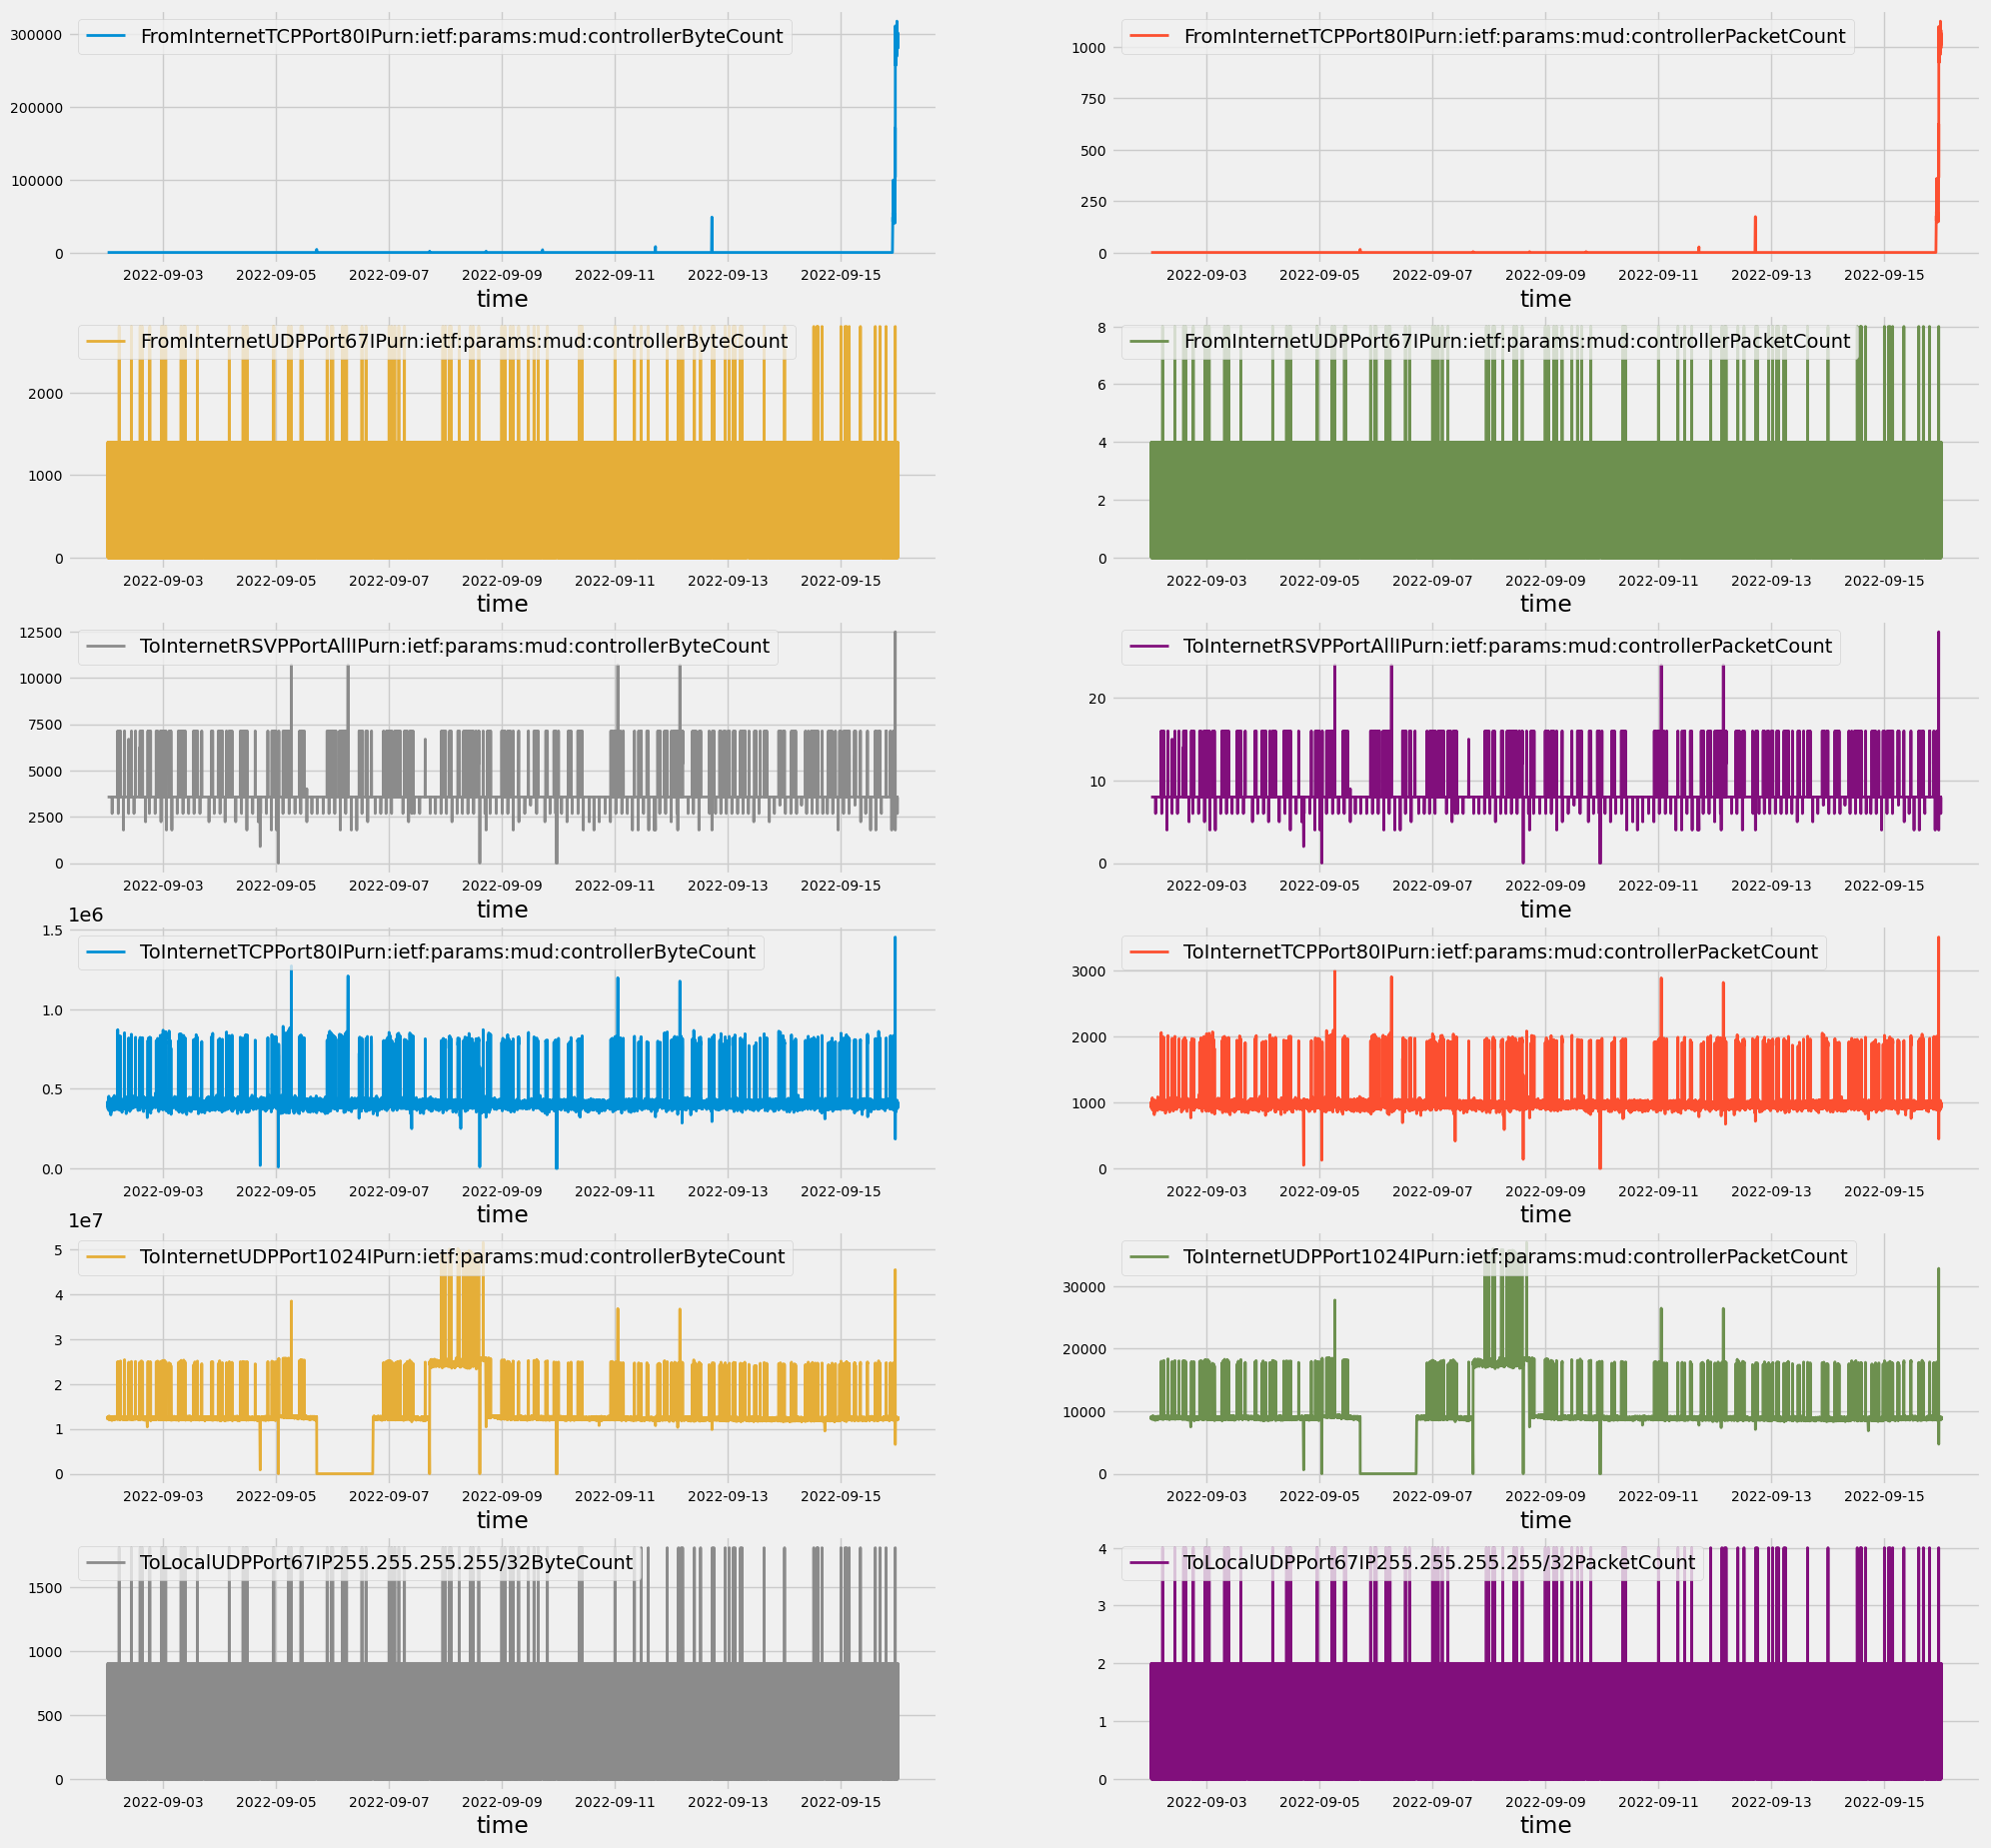

In [74]:
plt.style.use('fivethirtyeight')
df_dev_nozero.plot(subplots=True,
                  layout=(6,2),
                  figsize=(22,22),
                  fontsize=10,
                  linewidth=2,
                  sharex=False)
plt.show()

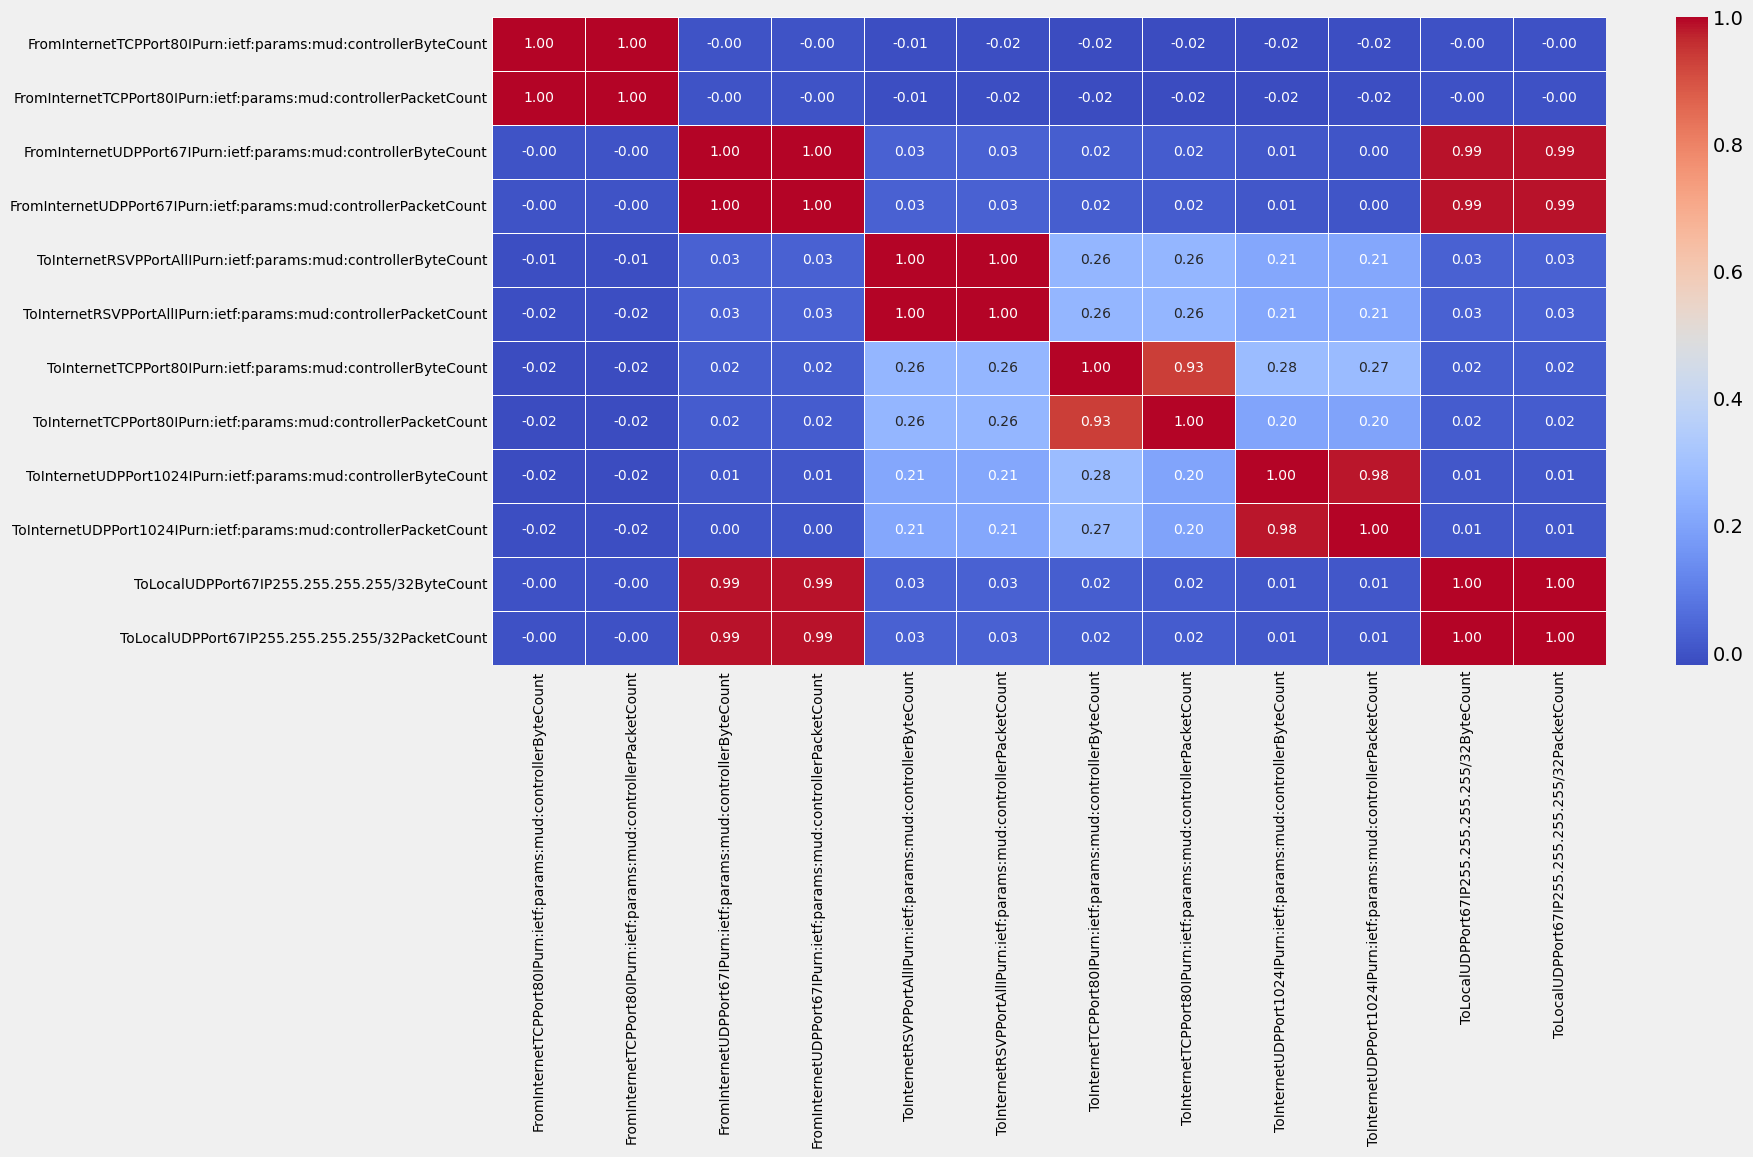

In [78]:
corr_matrix = df_dev_nozero.corr(method='spearman')
f, ax = plt.subplots(figsize=(16,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidth=0.4,
           annot_kws={'size': 10}, cmap='coolwarm', ax=ax)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [33]:
df_dev = df_dev.drop(['device_mac', 'time'], axis=1)

In [34]:
df_dev = df_dev.reset_index(drop=True)
df_dev.head()

,FromInternetTCPPort80IPurn:ietf:params:mud:controllerPacketCount,ToInternetTCPPort80IPurn:ietf:params:mud:controllerPacketCount,ToInternetUDPPort1024IPurn:ietf:params:mud:controllerPacketCount
0,0,957,9093
1,0,1004,8775
2,0,979,8993
3,0,962,9003
4,0,955,9135


In [15]:
df_dev.set_index('time', inplace=True)
Scaler = MinMaxScaler()
normal = Scaler.fit_transform(df_dev)

In [16]:
normal.shape

(19065, 3)

In [56]:
def batch(df, n):
    start = 0
    end = n
    while end < df.shape[0]-1:
        last_n_steps = df[:,start:end].T
        yield (last_n_steps, last_n_steps)
        start += 1
        end += 1
        if end == df.shape[0]:
            start = 0
            end = n-1